# Similarity Models

## Challenge: Implement the Nearest Neighbor algorithm


by: Melissa N 

Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

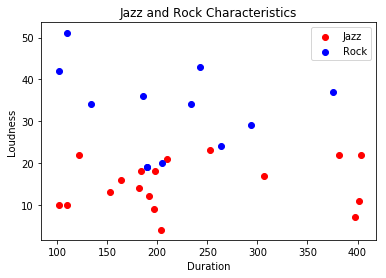

In [4]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [5]:
#Training Set containing info about X = music[['duration', 'loudness']]

X_train = np.column_stack(([184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                            205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                            164, 198, 204, 253, 234, 190, 182, 401, 376, 102], 
                           [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                            20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                            16, 18, 4, 23, 34, 19, 14, 11, 37, 42]))

# We know whether the songs in our training data are jazz or not.
Y_train = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
            0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
            1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

## Test if the  song has 24 loudness and is 190 seconds long.
X_test = np.array([190, 24])

In [10]:
## Find Euclidean Distance between Training set and Test set 
Eucl_D = np.sqrt(np.sum((X_train-X_test)**2, axis=1))
print(Eucl_D)

[   8.48528137   56.88585061   56.30275304   12.64911064   68.02940541
   16.55294536  104.12012294  192.01041638   89.10667764   74.           15.5241747
   81.21576202  117.20921465   84.43340571  207.69689454   38.60051813
    5.           12.16552506   20.22374842  213.00938946   27.20294102
   10.           24.41311123   63.00793601   45.12205669    5.
   12.80624847  211.40009461  186.45374762   89.82204629]


In [11]:
# Return the Y_train value at the minimum index.
min_index = np.argmin(Eucl_D)
print(Y_train[min_index])

0


In [12]:
min_index

16